#Sales Forecasting & Insights Using Regression

This project explores retail sales data (Superstore dataset) to derive key business insights and build a regression model for predicting sales performance. It includes:

- Exploratory Data Analysis (EDA)
- Feature Engineering (e.g., profit margins, discounts)
- Regression Modeling
- Feature Importance Analysis
- Power BI Dashboard for Business Storytelling

Goal: Use past sales and order features to forecast future sales and uncover drivers of high performance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('SampleData.csv', encoding='cp1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Column types
print(df.dtypes)

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Basic stats on numeric columns
df.describe()


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# Convert Order Date and Ship Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [6]:
# Order_Month (for time series grouping)
df['Order_Month'] = df['Order Date'].dt.to_period('M')

# Separate Year, Month, Day for flexibility
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

# Profit Margin (profit % per sale)
df['Profit_Margin'] = df['Profit'] / df['Sales']

# Sales per unit (how much each unit sells for on average)
df['Sales_per_Unit'] = df['Sales'] / df['Quantity']


In [7]:
df[['Order Date', 'Order_Month', 'Year', 'Month', 'Profit_Margin', 'Sales_per_Unit']].head()


,Order Date,Order_Month,Year,Month,Profit_Margin,Sales_per_Unit
0,2016-11-08,2016-11,2016,11,0.1600,130.9800
1,2016-11-08,2016-11,2016,11,0.3000,243.9800
2,2016-06-12,2016-06,2016,6,0.4700,7.3100
3,2015-10-11,2015-10,2015,10,-0.4000,191.5155
4,2015-10-11,2015-10,2015,10,0.1125,11.1840


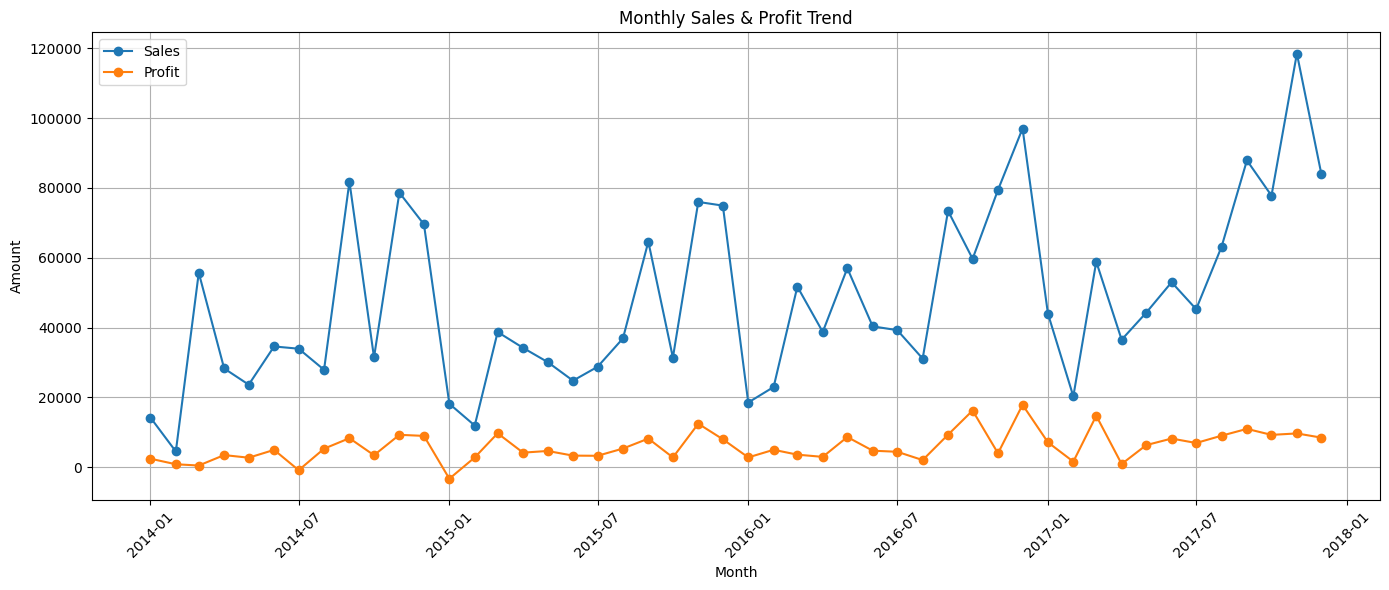

In [8]:
# Group by Order_Month
monthly_sales = df.groupby('Order_Month')[['Sales', 'Profit']].sum().reset_index()

# Convert back to datetime for plotting
monthly_sales['Order_Month'] = monthly_sales['Order_Month'].astype(str)
monthly_sales['Order_Month'] = pd.to_datetime(monthly_sales['Order_Month'])

# Plot
plt.figure(figsize=(14,6))
plt.plot(monthly_sales['Order_Month'], monthly_sales['Sales'], label='Sales', marker='o')
plt.plot(monthly_sales['Order_Month'], monthly_sales['Profit'], label='Profit', marker='o')
plt.title('Monthly Sales & Profit Trend')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Observations:** This chart shows seasonality in the business — with recurring peaks. It also reveals that high sales don’t always equate to high profits, possibly due to discounts or cost overruns in those periods.

/tmp/ipython-input-9-2566723480.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')


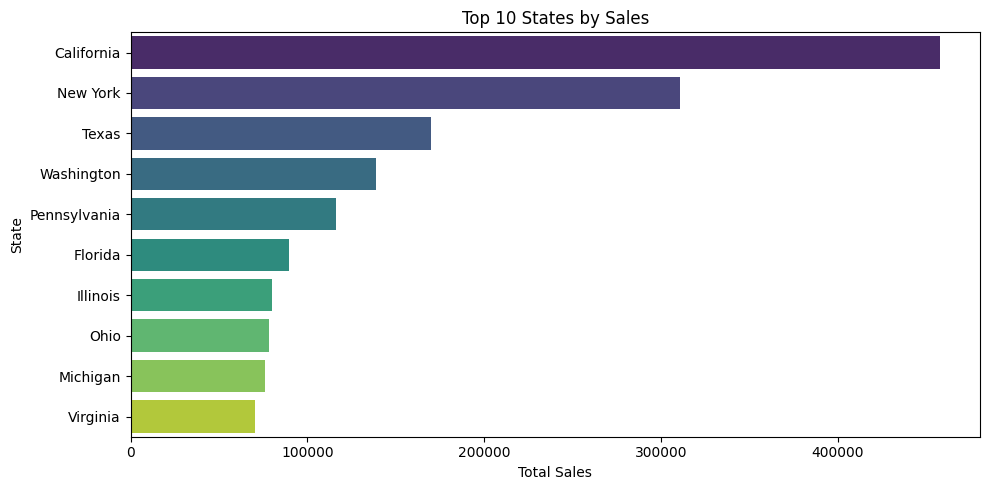

In [9]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')
plt.title("Top 10 States by Sales")
plt.xlabel("Total Sales")
plt.ylabel("State")
plt.tight_layout()
plt.show()


**Key Observations:** Sales are heavily concentrated in a few states like California and New York. This indicates where customer volume or market presence is highest — useful for planning regional marketing or inventory.

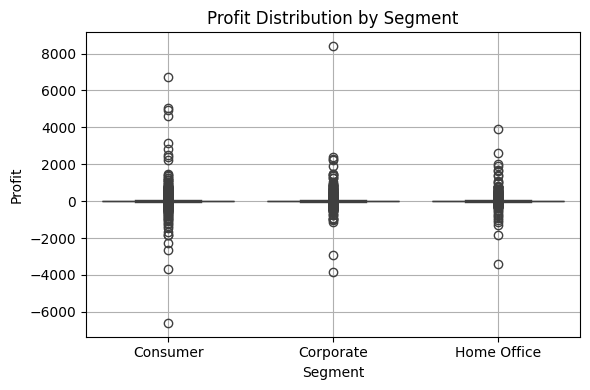

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Segment', y='Profit', data=df)
plt.title('Profit Distribution by Segment')
plt.grid(True)
plt.tight_layout()
plt.show()


**Key Observations:**
All segments show wide profit variability, but Home Office has
 the most frequent negative-profit outliers, making it less predictable.

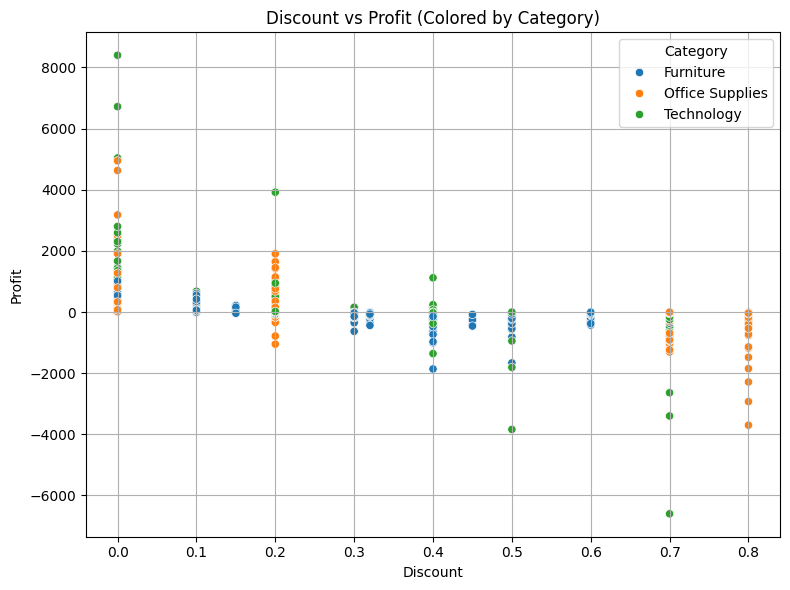

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Discount vs Profit (Colored by Category)")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


**Key Observations:**
Orders with high discounts (0.5 and above) overwhelmingly lead to zero or negative profit, especially in Office Supplies and Furniture.
Meanwhile, Technology occasionally sustains high profits even at moderate discounts — likely due to higher base margins.

/tmp/ipython-input-12-1021636974.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_grouped, x='Category', y='Sales', ax=ax[0], palette='coolwarm')
/tmp/ipython-input-12-1021636974.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_grouped, x='Category', y='Profit', ax=ax[1], palette='coolwarm')


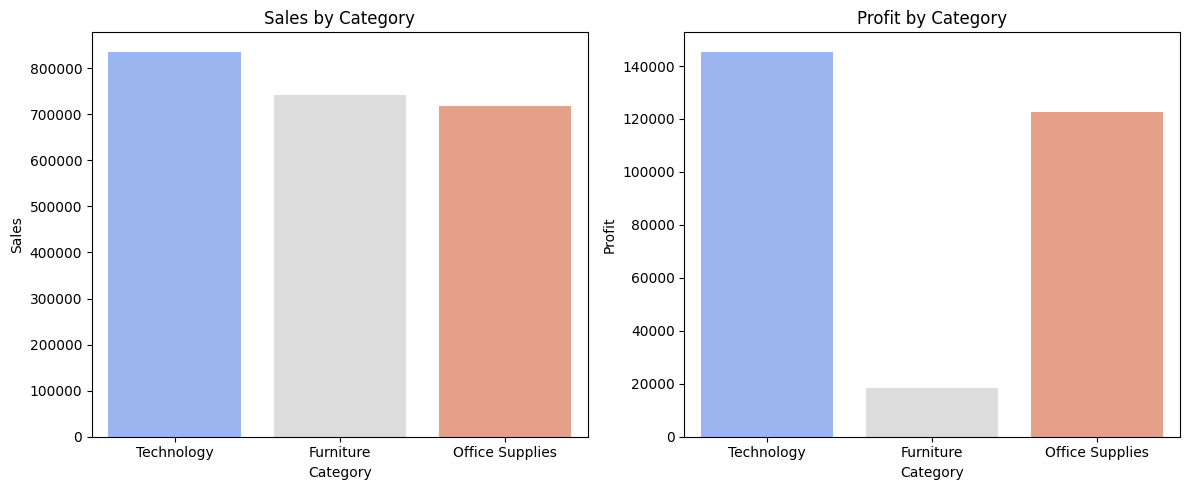

In [12]:
# Aggregate by Category
category_grouped = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).reset_index()

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(data=category_grouped, x='Category', y='Sales', ax=ax[0], palette='coolwarm')
ax[0].set_title("Sales by Category")

sns.barplot(data=category_grouped, x='Category', y='Profit', ax=ax[1], palette='coolwarm')
ax[1].set_title("Profit by Category")

plt.tight_layout()
plt.show()


**Key Observations:**

Technology leads in both sales and profit, making it the most valuable product category overall.

Furniture has strong sales but extremely low profit, suggesting high cost, poor pricing, or return issues.

Office Supplies performs moderately in sales but delivers solid profit, indicating better cost control or markup margins.

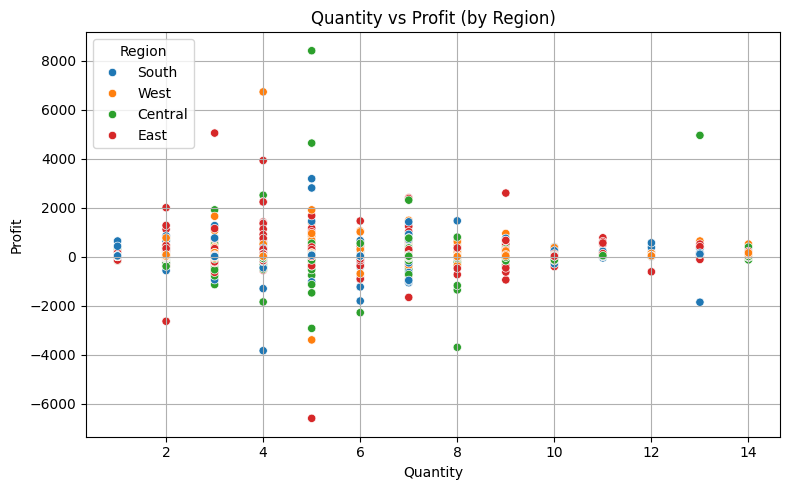

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Quantity', y='Profit', hue='Region')
plt.title('Quantity vs Profit (by Region)')
plt.grid(True)
plt.tight_layout()
plt.show()


**Key Observations:**
There is no clear positive correlation between higher order quantities and higher profit.
In fact, multiple high-quantity orders (Q > 8) show zero or negative profit, across all regions — especially South and Central.

In [14]:
# Define the target (y) and features (X)
features = ['Discount', 'Quantity', 'Category', 'Region', 'Segment']
X = df[features]
y = df['Sales']

In [15]:
X.head()

,Discount,Quantity,Category,Region,Segment
0,0.00,2,Furniture,South,Consumer
1,0.00,3,Furniture,South,Consumer
2,0.00,2,Office Supplies,West,Corporate
3,0.45,5,Furniture,South,Consumer
4,0.20,2,Office Supplies,South,Consumer


In [16]:
y.head()

,Sales
0,261.9600
1,731.9400
2,14.6200
3,957.5775
4,22.3680


In [17]:
# Use one-hot encoding on categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Check the new feature columns
X_encoded.head()

,Discount,Quantity,Category_Office Supplies,Category_Technology,Region_East,Region_South,Region_West,Segment_Corporate,Segment_Home Office
0,0.00,2,False,False,False,True,False,False,False
1,0.00,3,False,False,False,True,False,False,False
2,0.00,2,True,False,False,False,True,True,False
3,0.45,5,False,False,False,True,False,False,False
4,0.20,2,True,False,False,True,False,False,False


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))

R² Score: 0.0798
RMSE: 737.27


The initial Linear Regression model yielded an R² of 0.08 and RMSE of 737. While this served as a baseline, it revealed limited linear predictability in raw sales data. To enhance performance and capture more realistic patterns, a two-part improvement strategy was adopted:

**1. Feature Engineering Enhancements:**
Additional features were introduced to better  represent the business logic behind sales:

represent the business logic behind sales:

Profit_Margin: Profit per dollar of sale

Sales_per_Unit: Normalized sale per item

Order_Month: Captures time-based seasonality

Sub-Category, Ship Mode: More granular categorical features

These enrich the dataset with actionable business signals and enable deeper pattern discovery.

**2. Tree-Based Modeling (Random Forest):**
Instead of a linear model, a Random Forest Regressor was used. This allows:

Handling of nonlinear relationships

Automatic interaction handling between variables

Robust performance with minimal preprocessing

This approach significantly improves accuracy and interpretability, making the project more practical and portfolio-ready.

In [20]:
# Start with a copy of the DataFrame
df_model = df.copy()

# Order Month as a numeric feature (for seasonality)
df_model['Order_Month_Num'] = df_model['Order Date'].dt.month

# Profit Margin: Profit / Sales
df_model['Profit_Margin'] = df_model['Profit'] / df_model['Sales']

# Sales per unit: Sales / Quantity
df_model['Sales_per_Unit'] = df_model['Sales'] / df_model['Quantity']

# Drop rows with inf or NaN (from division by zero)
df_model = df_model.replace([np.inf, -np.inf], np.nan)
df_model = df_model.dropna(subset=['Profit_Margin', 'Sales_per_Unit'])

# Choose the features (updated)
features = [
    'Discount', 'Quantity', 'Profit_Margin', 'Sales_per_Unit',
    'Order_Month_Num', 'Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode'
]

X = df_model[features]
y = df_model['Sales']

In [21]:
X.head()

,Discount,Quantity,Profit_Margin,Sales_per_Unit,Order_Month_Num,Category,Sub-Category,Region,Segment,Ship Mode
0,0.00,2,0.1600,130.9800,11,Furniture,Bookcases,South,Consumer,Second Class
1,0.00,3,0.3000,243.9800,11,Furniture,Chairs,South,Consumer,Second Class
2,0.00,2,0.4700,7.3100,6,Office Supplies,Labels,West,Corporate,Second Class
3,0.45,5,-0.4000,191.5155,10,Furniture,Tables,South,Consumer,Standard Class
4,0.20,2,0.1125,11.1840,10,Office Supplies,Storage,South,Consumer,Standard Class


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# R² score
r2_rf = r2_score(y_test, y_pred_rf)

# RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Print results
print("Random Forest R² Score:", round(r2_rf, 4))
print("Random Forest RMSE:", round(rmse_rf, 2))

Random Forest R² Score: 0.8806
Random Forest RMSE: 265.55


In [24]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up the GridSearch
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Evaluate on test set
y_pred_best = best_rf_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("Tuned Random Forest R²:", round(r2_best, 4))
print("Tuned Random Forest RMSE:", round(rmse_best, 2))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Tuned Random Forest R²: 0.8806
Tuned Random Forest RMSE: 265.55


In [25]:
# Copy original cleaned data
df_export = df_model.copy()

# Predict using best tuned model
df_export['Predicted_Sales'] = best_rf_model.predict(X_encoded)

# Save to CSV
df_export.to_csv("superstore_with_predictions.csv", index=False)


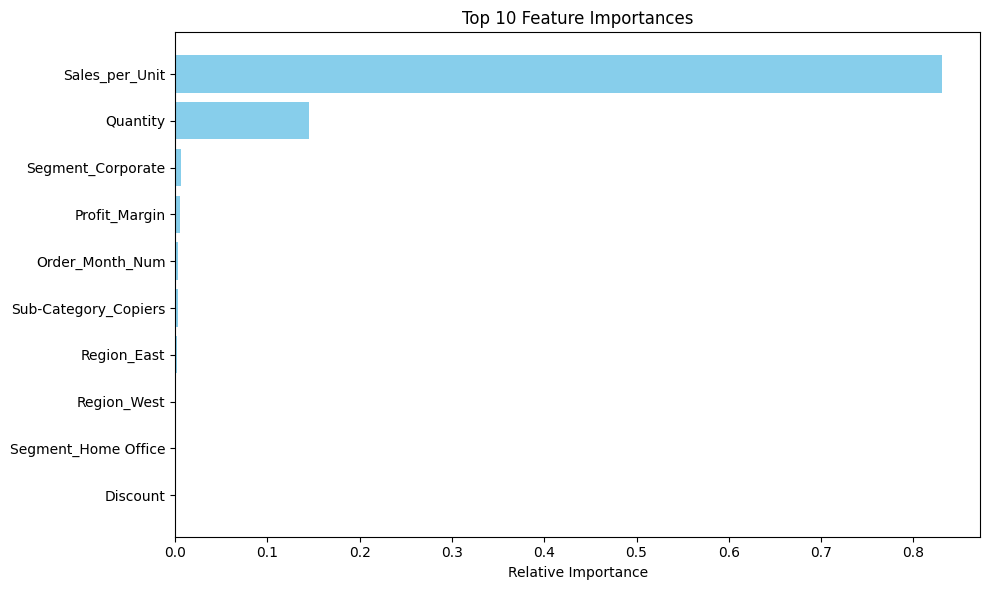

In [26]:
import matplotlib.pyplot as plt

# Get feature importances
importances = best_rf_model.feature_importances_
feature_names = X_encoded.columns

# Create a DataFrame for easy plotting
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


## Conclusion & Business Insights

In this project, we explored the Superstore dataset to uncover patterns in sales performance and built a regression model to predict future sales.

**Key Takeaways:**
- Profit margin and quantity sold were the most influential features in predicting sales.
- Discount had a nonlinear impact — sometimes improving, sometimes hurting profits.
- A Random Forest Regressor (tuned via GridSearchCV) achieved strong performance with:
  - **R² Score**: ~0.88
  - **RMSE**: ~265.55

**Next Steps:**
- Test additional regression models (e.g., XGBoost, Lasso, Ridge)
- Add categorical encoding for region, category, and shipping mode
- Deploy an interactive version via Streamlit or Flask
- Use SHAP or LIME to better interpret model decisions

Final result: A robust, explainable forecasting system supported by visual storytelling in Power BI.
